In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nbashots as nba # this will throw a warning if using matplotlib 1.5
from sklearn.datasets import make_blobs

%matplotlib inline

In [20]:
curry_id = nba.get_player_id("Curry, Stephen")[0]
curry_id

201939

In [21]:
# "shots" is the defualt paramter value
players_with_shots = nba.get_all_player_ids("shots")
players_with_shots.head()

,PERSON_ID,DISPLAY_LAST_COMMA_FIRST
0,1505,"Abdul-Wahad, Tariq"
1,949,"Abdur-Rahim, Shareef"
2,203518,"Abrines, Alex"
3,101165,"Acker, Alex"
4,203112,"Acy, Quincy"


In [22]:
players_with_shots.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1587 entries, 0 to 1586
Data columns (total 2 columns):
PERSON_ID                   1587 non-null int64
DISPLAY_LAST_COMMA_FIRST    1587 non-null object
dtypes: int64(1), object(1)
memory usage: 24.9+ KB


In [23]:
all_data = nba.get_all_player_ids("all_data")
all_data.head()

,PERSON_ID,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FIRST_LAST,ROSTERSTATUS,FROM_YEAR,TO_YEAR,PLAYERCODE,TEAM_ID,TEAM_CITY,TEAM_NAME,TEAM_ABBREVIATION,TEAM_CODE,GAMES_PLAYED_FLAG
0,76001,"Abdelnaby, Alaa",Alaa Abdelnaby,0,1990,1994,HISTADD_alaa_abdelnaby,0,,,,,Y
1,76002,"Abdul-Aziz, Zaid",Zaid Abdul-Aziz,0,1968,1977,HISTADD_zaid_abdul-aziz,0,,,,,Y
2,76003,"Abdul-Jabbar, Kareem",Kareem Abdul-Jabbar,0,1969,1988,HISTADD_kareem_abdul-jabbar,0,,,,,Y
3,51,"Abdul-Rauf, Mahmoud",Mahmoud Abdul-Rauf,0,1990,2000,mahmoud_abdul-rauf,0,,,,,Y
4,1505,"Abdul-Wahad, Tariq",Tariq Abdul-Wahad,0,1997,2003,tariq_abdul-wahad,0,,,,,Y


In [24]:
curry_logs = nba.PlayerLog(curry_id)


In [25]:
curry_logs.url_paramaters


{'LeagueID': '00',
 'PlayerID': 201939,
 'Season': '2016-17',
 'SeasonType': 'Regular Season'}

In [26]:
shots = nba.Shots()

In [27]:
curry_shots_df = nba.Shots(curry_id).get_shots()

In [79]:
# Set the size for our plots
plt.rcParams['figure.figsize'] = (12, 11)

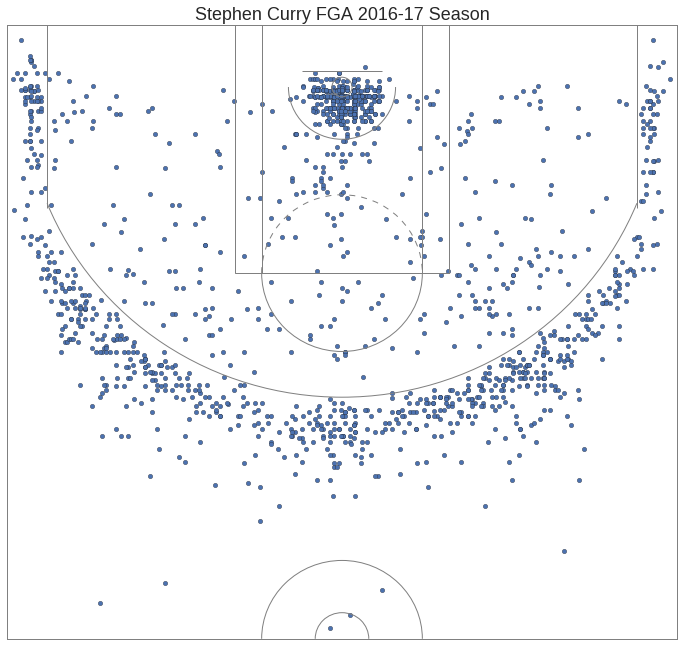

In [80]:

# Pass in Curry's FGA coordinates to shot_charts()
nba.shot_chart(curry_shots_df.LOC_X, curry_shots_df.LOC_Y,
              title="Stephen Curry FGA 2016-17 Season")

# lebron_id = nba.get_player_id("Curry,Stephen")[0]
# lebron_shots = nba.Shots(curry_id).get_shots()

plt.show()

In [81]:
from sklearn.cluster import KMeans

In [92]:
curry_shots_df.LOC_X.to_frame().join(curry_shots_df.LOC_Y.to_frame())
print ""

In [93]:
X = curry_shots_df.LOC_X.to_frame().join(curry_shots_df.LOC_Y.to_frame())

In [96]:
X.head()

,LOC_X,LOC_Y
0,130,257
1,189,174
2,159,229
3,163,141
4,-9,267


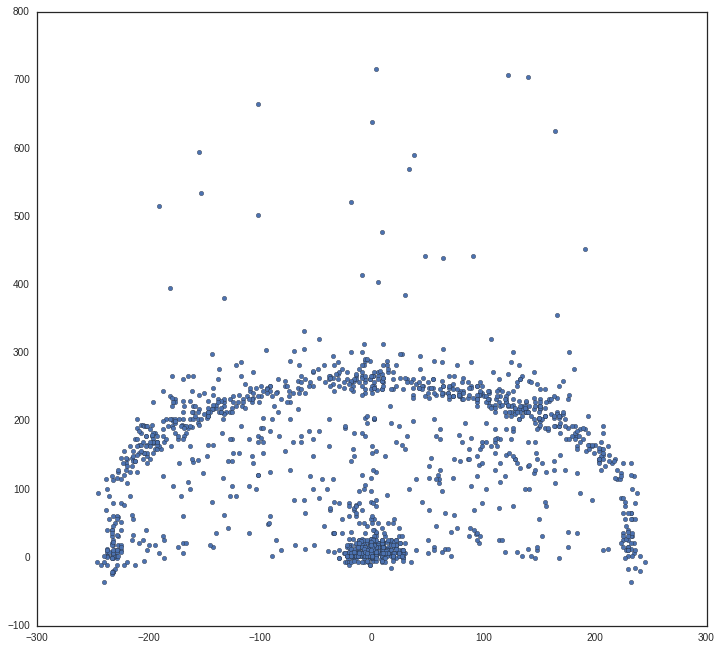

In [97]:
plt.scatter(X.LOC_X, X.LOC_Y)
plt.show()

In [98]:
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X)

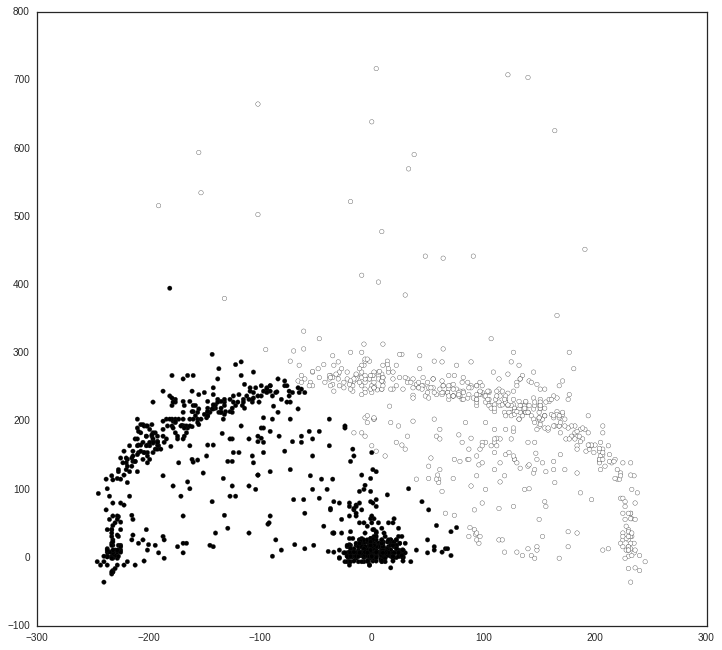

In [99]:
plt.scatter(X.LOC_X, X.LOC_Y, c=labels);
plt.show()

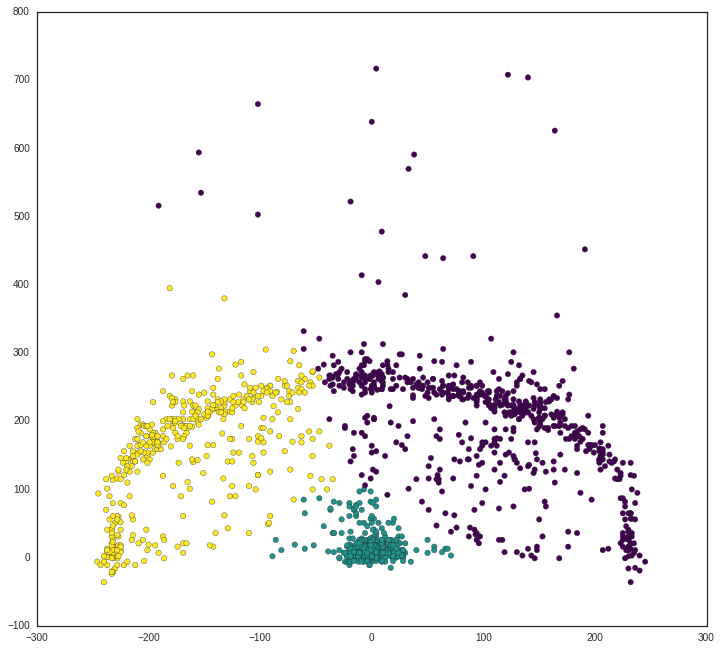

In [114]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=3,affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X.LOC_X, X.LOC_Y, c=labels,
            s=30, cmap='viridis');
plt.show()

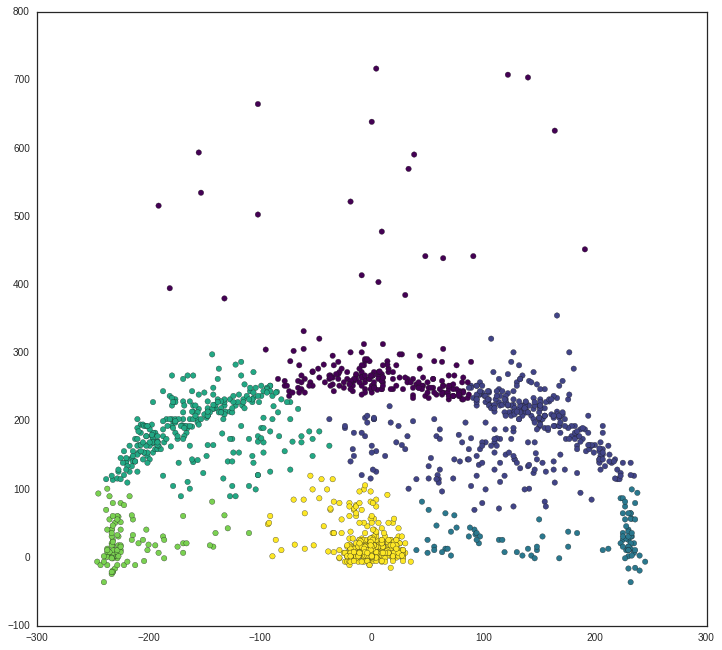

In [122]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(linkage="ward",
                                            connectivity=None,
                                            n_clusters=6)
labels = model.fit_predict(X)
plt.scatter(X.LOC_X, X.LOC_Y, c=labels,
            s=30, cmap='viridis');
plt.show()

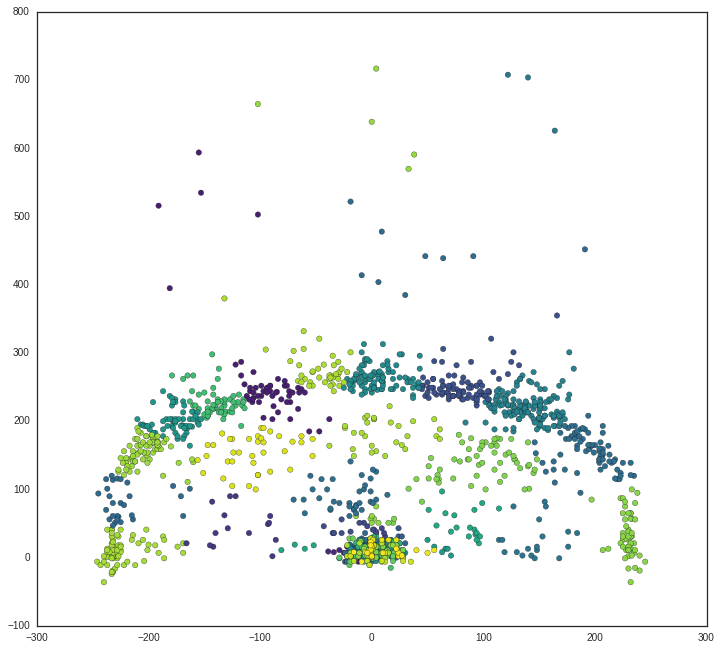

In [126]:
from sklearn.cluster import AffinityPropagation
model = AffinityPropagation()
labels = model.fit_predict(X)
plt.scatter(X.LOC_X, X.LOC_Y, c=labels,
            s=30, cmap='viridis');
plt.show()

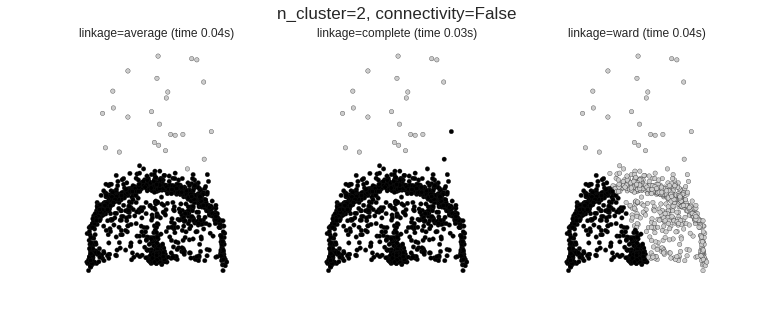

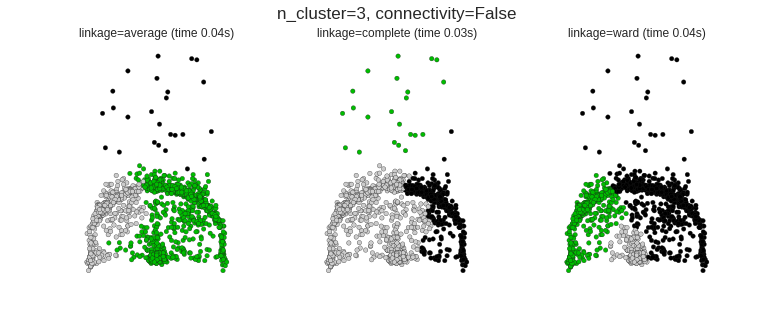

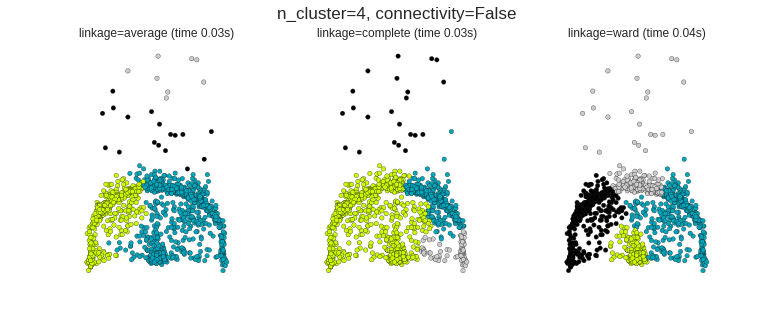

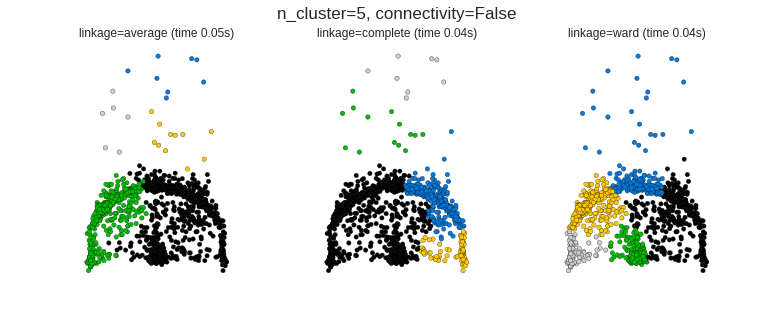

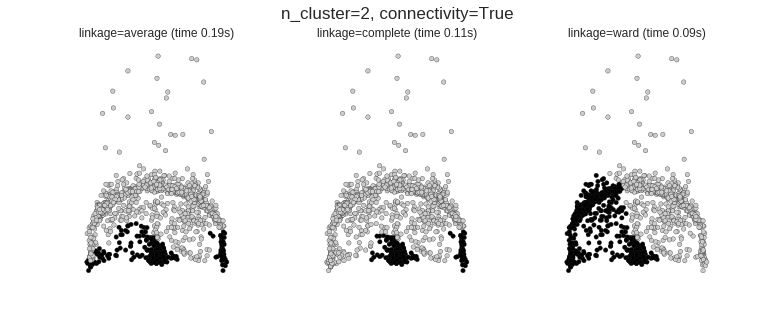

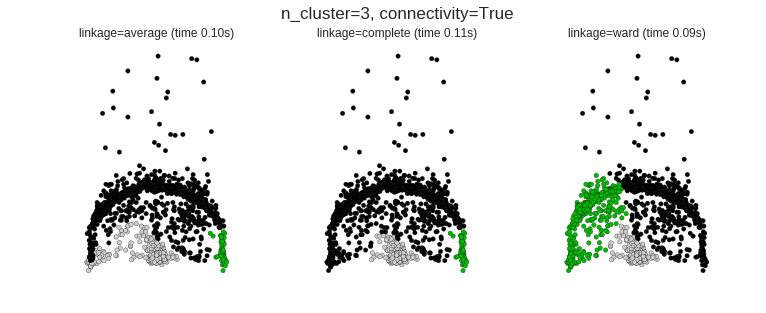

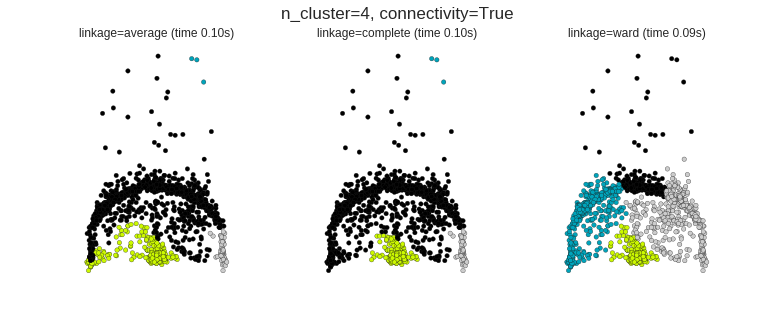

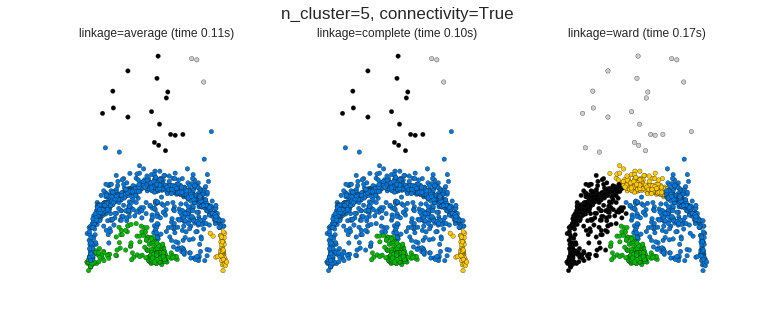

In [131]:
# Authors: Gael Varoquaux, Nelle Varoquaux
# License: BSD 3 clause

import time
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

# Create a graph capturing local connectivity. Larger number of neighbors
# will give more homogeneous clusters to the cost of computation
# time. A very large number of neighbors gives more evenly distributed
# cluster sizes, but may not impose the local manifold structure of
# the data
# knn_graph = kneighbors_graph(X, 3, include_self=False)

for connectivity in (None, knn_graph):
    for n_clusters in (2,3,4,5):
        plt.figure(figsize=(10, 4))
        for index, linkage in enumerate(('average', 'complete', 'ward')):
            plt.subplot(1, 3, index + 1)
            model = AgglomerativeClustering(linkage=linkage,
                                            connectivity=connectivity,
                                            n_clusters=n_clusters)
            t0 = time.time()
            model.fit(X)
            elapsed_time = time.time() - t0
            plt.scatter(X.LOC_X, X.LOC_Y, c=model.labels_,
                        cmap=plt.cm.spectral)
            plt.title('linkage=%s (time %.2fs)' % (linkage, elapsed_time),
                      fontdict=dict(verticalalignment='top'))
            plt.axis('equal')
            plt.axis('off')

            plt.subplots_adjust(bottom=0, top=.89, wspace=0,
                                left=0, right=1)
            plt.suptitle('n_cluster=%i, connectivity=%r' %
                         (n_clusters, connectivity is not None), size=17)


plt.show()